## Depict

In [1]:
import torch
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

from scene import Scene, GaussianModel
from scene.cameras import Camera
from tqdm import tqdm

from gaussian_renderer import render_fn_dict

render_fn = render_fn_dict["render"]
bg_color = [0, 0, 0]
background = torch.tensor(bg_color, dtype=torch.float32, device="cuda")

cloud: GaussianModel = GaussianModel(0) # setting to 3 doesn't help either
cloud.active_sh_degree = 0
cloud.percent_dense = 1

# # thick tensor
# cloud.set_gaussian(
#     torch.tensor([0.0, 0.0, 0.0],       dtype=torch.float32, device="cuda"),
#     torch.tensor([0.3, 1.0, 0.3],       dtype=torch.float32, device="cuda"),
#     torch.tensor([1.0, 0.0, 0.0, 0.0],  dtype=torch.float32, device="cuda"),
#     torch.tensor([1.0, 1.0, 1.0],       dtype=torch.float32, device="cuda"),
#     torch.tensor([0.5],                 dtype=torch.float32, device="cuda")
# )

# # thin tensor
# cloud.set_gaussian(
#     torch.tensor([0.0, 0.0, 0.0],       dtype=torch.float32, device="cuda"),
#     torch.tensor([0.3, 0.001, 0.3],       dtype=torch.float32, device="cuda"),
#     torch.tensor([1.0, 0.0, 0.0, 0.0],  dtype=torch.float32, device="cuda"),
#     torch.tensor([1.0, 1.0, 1.0],       dtype=torch.float32, device="cuda"),
#     torch.tensor([0.5],                 dtype=torch.float32, device="cuda")
# )

cloud.set_gaussian(
    torch.tensor([0.0, 0.0, 0.0],       dtype=torch.float32, device="cuda"),
    torch.tensor([0.3, 0.001, 0.3],       dtype=torch.float32, device="cuda"),
    torch.tensor([0.9807853, 0, 0, 0.1950903],  dtype=torch.float32, device="cuda"),
    torch.tensor([1.0, 1.0, 1.0],       dtype=torch.float32, device="cuda"),
    torch.tensor([0.5],                 dtype=torch.float32, device="cuda")
)

class Pipeline:
    def __init__(self):
        self.debug = False
        self.compute_cov3D_python = False
        self.compute_SHs_python = False

pipe = Pipeline()


rot = np.array([
    [1, 0, 0],
    [0, 0, -1],
    [0, 1, 0]
])
pos = np.array([0,10,0], dtype=np.float32)
W2C = np.zeros((4, 4))
W2C[:3, :3] = rot
W2C[:3, 3] = pos
W2C[3, 3] = 1
Rt = np.linalg.inv(W2C)
R = Rt[:3, :3].transpose()
T = Rt[:3, 3]
camera = Camera(
    0, # id
    R, # U,V,W
    T, # position
    # 10, 10, # fov
    np.deg2rad(20), np.deg2rad(20),
    None, None, None, None, None, "", 0, height=5, width=5
)

Using /home/user1/.cache/torch_extensions/py37_cu116 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /home/user1/.cache/torch_extensions/py37_cu116/_bvh_tracing/build.ninja...
Building extension module _bvh_tracing...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
ninja: no work to do.
Loading extension module _bvh_tracing...
Using /home/user1/.cache/torch_extensions/py37_cu116 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /home/user1/.cache/torch_extensions/py37_cu116/r3dg_rasterization/build.ninja...
Building extension module r3dg_rasterization...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
ninja: no work to do.
Loading extension module r3dg_rasterization...


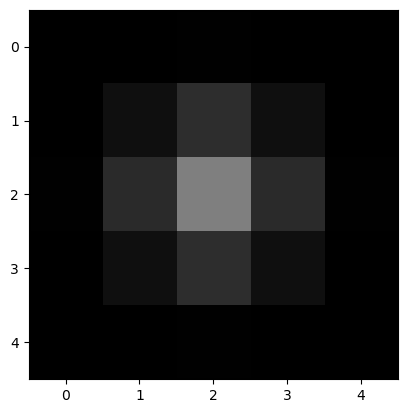

In [2]:
render_pkg = render_fn(camera, cloud, pipe, background,
                       is_training=False, iteration=0)

img: NDArray = render_pkg["render"].detach().cpu().numpy().swapaxes(0,2).swapaxes(0,1)

plt.imshow(img)

## Plot Error Rate

In [3]:
import torch
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

from scene import Scene, GaussianModel
from scene.cameras import Camera
from tqdm import tqdm

from gaussian_renderer import render_fn_dict

render_fn = render_fn_dict["render"]
bg_color = [0, 0, 0]
background = torch.tensor(bg_color, dtype=torch.float32, device="cuda")

cloud: GaussianModel = GaussianModel(0)
cloud.active_sh_degree = 0
cloud.percent_dense = 1

# # zero rotation big gaussian
# cloud.add_gaussian(
#     MU.float3(0, 0, 0),
#     MU.float3(3, 1, 3),
#     Quaternion.normalize( Quaternion(1, 0, 0, 0) ),
#     MU.float3(1,1,1),
#     0.5
# )

# # zero rotation
# cloud.add_gaussian(
#     MU.float3(0, 0, 0),
#     MU.float3(0.03, 1, 0.03),
#     Quaternion.normalize( Quaternion(1, 0, 0, 0) ),
#     MU.float3(1,1,1),
#     0.5
# )
# cloud.set_gaussian(
#     torch.tensor([0.0, 0.0, 0.0],       dtype=torch.float32, device="cuda"),
#     torch.tensor([0.03, 1, 0.03],       dtype=torch.float32, device="cuda"),
#     torch.tensor([1.0, 0.0, 0.0, 0.0],  dtype=torch.float32, device="cuda"),
#     torch.tensor([1.0, 1.0, 1.0],       dtype=torch.float32, device="cuda"),
#     torch.tensor([0.5],                 dtype=torch.float32, device="cuda")
# )

# # zero rotation
# cloud.add_gaussian(
#     MU.float3(0, 0, 0),
#     MU.float3(0.3, 1, 0.3),
#     Quaternion.normalize( Quaternion(1, 0, 0, 0) ),
#     MU.float3(1,1,1),
#     0.5
# )
# cloud.set_gaussian(
#     torch.tensor([0.0, 0.0, 0.0],       dtype=torch.float32, device="cuda"),
#     torch.tensor([0.3, 1.0, 0.3],       dtype=torch.float32, device="cuda"),
#     torch.tensor([1.0, 0.0, 0.0, 0.0],  dtype=torch.float32, device="cuda"),
#     torch.tensor([1.0, 1.0, 1.0],       dtype=torch.float32, device="cuda"),
#     torch.tensor([0.5],                 dtype=torch.float32, device="cuda")
# )


# # 22.5° rotation
# cloud.add_gaussian(
#     MU.float3(0, 0, 0),
#     MU.float3(0.3, .1, 0.3),
#     Quaternion.normalize( Quaternion(0.9807853, 0, 0, 0.1950903) ),
#     MU.float3(1,1,1),
#     0.5
# )
cloud.set_gaussian(
    torch.tensor([0.0, 0.0, 0.0],       dtype=torch.float32, device="cuda"),
    torch.tensor([0.3, 0.1, 0.3],       dtype=torch.float32, device="cuda"),
    torch.tensor([0.9807853, 0, 0, 0.1950903],  dtype=torch.float32, device="cuda"),
    torch.tensor([1.0, 1.0, 1.0],       dtype=torch.float32, device="cuda"),
    torch.tensor([0.5],                 dtype=torch.float32, device="cuda")
)

# # 45° rotation
# cloud.add_gaussian(
#     MU.float3(0, 0, 0),
#     MU.float3(.4, .1, .3),
#     Quaternion.normalize( Quaternion(0.9238795, 0, 0, 0.3826834) ),
#     MU.float3(1,1,1),
#     0.5
# )
# cloud.set_gaussian(
#     torch.tensor([0.0, 0.0, 0.0],       dtype=torch.float32, device="cuda"),
#     torch.tensor([0.3, 1.0, 0.3],       dtype=torch.float32, device="cuda"),
#     torch.tensor([0.9238795, 0, 0, 0.3826834],  dtype=torch.float32, device="cuda"),
#     torch.tensor([1.0, 1.0, 1.0],       dtype=torch.float32, device="cuda"),
#     torch.tensor([0.5],                 dtype=torch.float32, device="cuda")
# )

# # 67.5° rotation
# cloud.add_gaussian(
#     MU.float3(0, 0, 0),
#     MU.float3(.7, .1, .3), 
#     Quaternion.normalize( Quaternion(0.8314696, 0, 0, 0.5555702) ),
#     MU.float3(1,1,1),
#     0.5
# )
# cloud.set_gaussian(
#     torch.tensor([0.0, 0.0, 0.0],       dtype=torch.float32, device="cuda"),
#     torch.tensor([0.7, 0.1, 0.3],       dtype=torch.float32, device="cuda"),
#     torch.tensor([0.8314696, 0, 0, 0.5555702],  dtype=torch.float32, device="cuda"),
#     torch.tensor([1.0, 1.0, 1.0],       dtype=torch.float32, device="cuda"),
#     torch.tensor([0.5],                 dtype=torch.float32, device="cuda")
# )

# # 89° rotation
# cloud.add_gaussian(
#     MU.float3(0, 0, 0),
#     MU.float3(1, .1, .3),
#     Quaternion.normalize( Quaternion(0.7132504, 0, 0, 0.7009093) ),
#     MU.float3(1,1,1),
#     0.5
# )
# cloud.set_gaussian(
#     torch.tensor([0.0, 0.0, 0.0],       dtype=torch.float32, device="cuda"),
#     torch.tensor([1.0, 0.1, 0.3],       dtype=torch.float32, device="cuda"),
#     torch.tensor([0.7132504, 0, 0, 0.7009093],  dtype=torch.float32, device="cuda"),
#     torch.tensor([1.0, 1.0, 1.0],       dtype=torch.float32, device="cuda"),
#     torch.tensor([0.5],                 dtype=torch.float32, device="cuda")
# )

FOV = np.deg2rad(20) # total fov
# FOV = 1

class Pipeline:
    def __init__(self):
        self.debug = False
        self.compute_cov3D_python = False
        self.compute_SHs_python = False

pipe = Pipeline()


rot = np.array([
    [1, 0, 0],
    [0, 0, -1],
    [0, 1, 0]
])
pos = np.array([0,10,0], dtype=np.float32)
W2C = np.zeros((4, 4))
W2C[:3, :3] = rot
W2C[:3, 3] = pos
W2C[3, 3] = 1
Rt = np.linalg.inv(W2C)
R = Rt[:3, :3].transpose()
T = Rt[:3, 3]
cam = Camera(
    0, # id
    R, # U,V,W
    T, # position
    FOV, FOV, # fov 
    None, None, None, None, None, "", 0, height=5, width=5
)


# cloud.optimizer = torch.optim.Adam( [cloud._xyz, cloud._scaling, cloud._rotation] )

loss_fn = torch.nn.functional.l1_loss

# one offset to right
target_image = torch.zeros( (cam.image_height, cam.image_width, 3), dtype=torch.float32, device="cuda" )
target_image[2,2] = torch.tensor((0.5, 0.5, 0.5), dtype=torch.float32, device="cuda")

In [4]:
steps = 1_000 # 10_000
y_sizes = np.zeros(steps, dtype=np.float32)

pos_grads = np.zeros((steps,3), dtype=np.float32)
size_grads = np.zeros((steps, 3), dtype=np.float32)
quaternion_grads = np.zeros((steps, 4), dtype=np.float32)


_sub_st = steps // 10
y_sizes[:_sub_st] = 1 / (10 ** np.linspace(0, 1, _sub_st))       # from 1.0 to 0.1
y_sizes[_sub_st:] = 10 ** -np.linspace(1, 6, steps-_sub_st) # from 0.1 to 1e-6

_distances = np.zeros(steps, dtype=float)

losses = np.zeros(steps, dtype=float)

for i, y_size in tqdm( enumerate( list( y_sizes ) ) ):
    # print(i)
    # update size
    with torch.no_grad():
        cloud._scaling[0, 1] = cloud.scaling_inverse_activation( torch.tensor(y_size) )
    
    render_pkg = render_fn(camera, cloud, pipe, background,
                       is_training=False, iteration=0) # override_color=(cloud._shs_dc-0.5)[0]  # makes gradient stable

    render: NDArray = render_pkg["render"].swapaxes(0,2).swapaxes(0,1)

    # plt.imshow(render.detach().cpu().numpy())
    # plt.show()

    loss = loss_fn( render, target_image )
    losses[i] = loss.detach().item()
    loss.backward()

    # positive y gradient means away from camera
    pos_grads[i] = cloud._xyz.grad[0].detach().cpu().numpy()

    size_grads[i] = cloud._scaling.grad[0].detach().cpu().numpy()
    
    quaternion_grads[i] = cloud._rotation.grad[0].detach().cpu().numpy()
    
    cloud._xyz.grad[...]        = 0
    cloud._scaling.grad[...]    = 0
    cloud._rotation.grad[...]   = 0
    cloud._shs_dc.grad[...]     = 0
    cloud._shs_rest.grad[...]   = 0

1000it [00:10, 91.42it/s]


In [5]:
cloud._shs_dc

Parameter containing:
tensor([[[1.7725, 1.7725, 1.7725]]], device='cuda:0', requires_grad=True)

In [6]:
cloud._shs_rest

Parameter containing:
tensor([], device='cuda:0', size=(1, 0, 3), requires_grad=True)

In [7]:
cloud.active_sh_degree

0

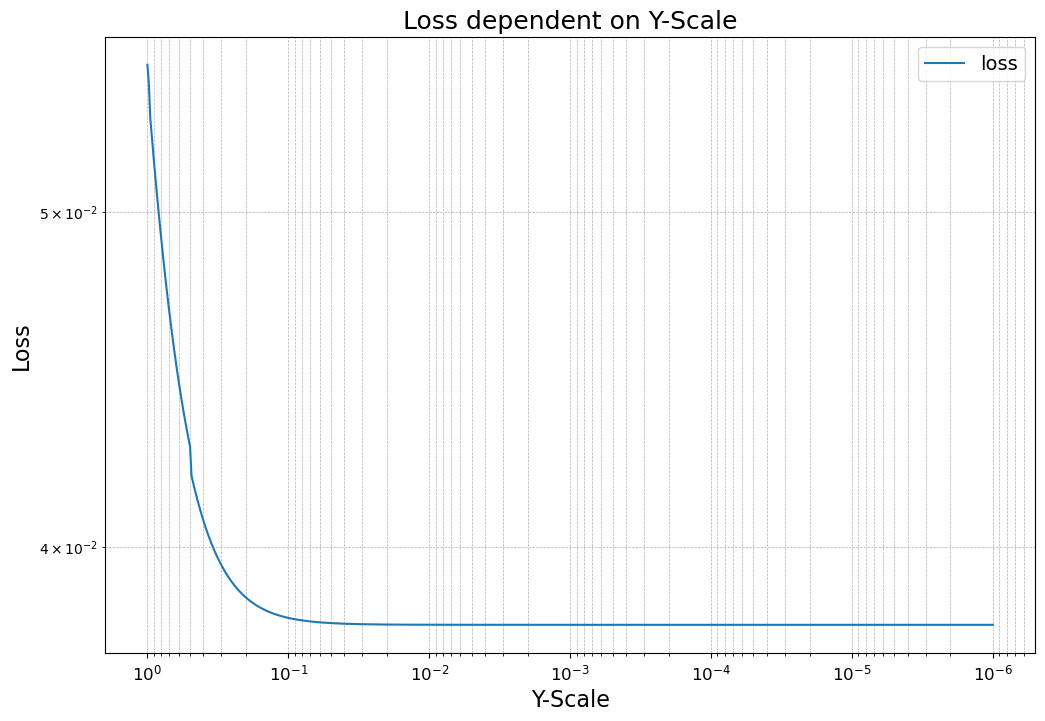

In [8]:
# plot loss

import matplotlib.pyplot as plt

%matplotlib inline

f = plt.figure(figsize=(12, 8))

loss_plot = losses.copy()
# loss_plot = np.abs( loss_plot )
# loss_plot[ pos_grads != pos_grads ] = 1e12 # remove nans
# loss_plot[ pos_grads == 0 ] = 1e-12 # remove zeros (should not happen)

plt.plot( y_sizes, loss_plot, label="loss" )
plt.gca().invert_xaxis()    # from thick to thin
plt.legend(fontsize=14)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Background grid
plt.xscale("log") # gradients can get very big, so use log scale
if (loss_plot <= 0).any():
    plt.yscale("linear")
else:
    plt.yscale("log")

plt.title('Loss dependent on Y-Scale', fontsize=18)
plt.xlabel("Y-Scale", fontsize=16)
plt.ylabel('Loss', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# from pathlib import Path
# path = Path("/home/user1/Documents/Relightable3DGaussian/tmp")
# plt.savefig( str(path / f"numerical_position_issues_GS.png") )
plt.show()
# plt.close()


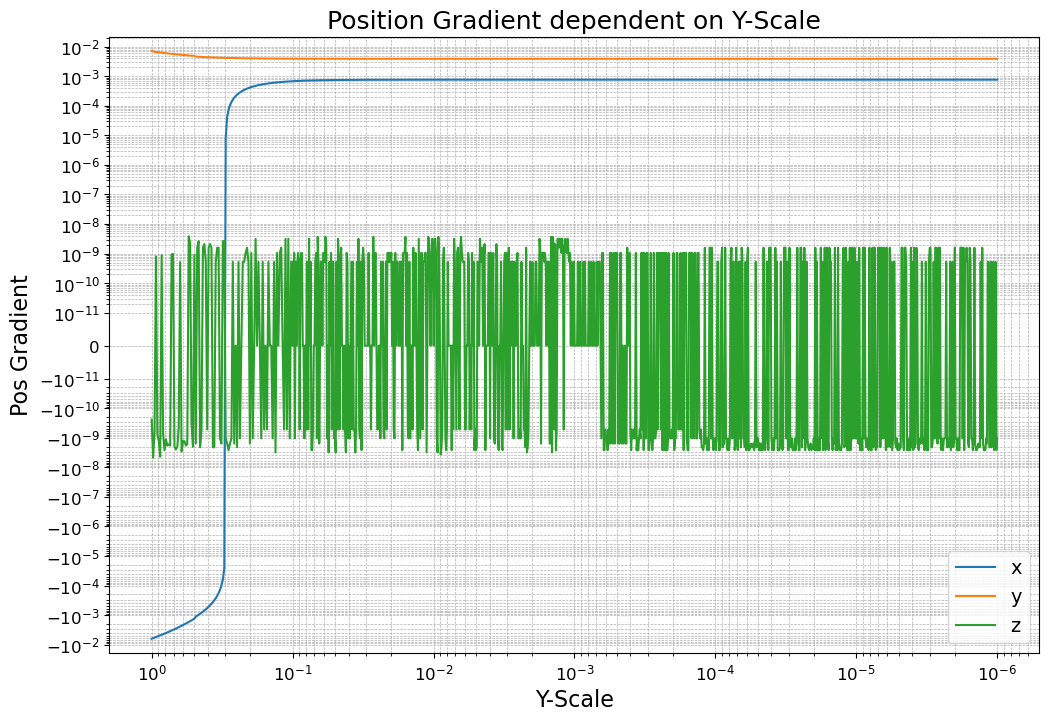

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

f = plt.figure(figsize=(12, 8))

pos_grads_plot = pos_grads.copy()
# pos_grads_plot = np.abs( pos_grads_plot )
# pos_grads_plot[ pos_grads != pos_grads ] = 1e12 # remove nans
# pos_grads_plot[ pos_grads == 0 ] = 1e-12 # remove zeros (should not happen)

plt.plot( y_sizes, pos_grads_plot[:,0], label="x" )
plt.plot( y_sizes, pos_grads_plot[:,1], label="y" )
plt.plot( y_sizes, pos_grads_plot[:,2], label="z" )
plt.gca().invert_xaxis()    # from thick to thin
plt.legend(fontsize=14)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Background grid
plt.xscale("log") # gradients can get very big, so use log scale
# if (pos_grads_plot <= 0).any():
#     plt.yscale("linear")
# else:
#     plt.yscale("log")
plt.yscale("symlog", linscale=1, linthresh=1e-11, subs=np.arange(10))


plt.title('Position Gradient dependent on Y-Scale', fontsize=18)
plt.xlabel("Y-Scale", fontsize=16)
plt.ylabel('Pos Gradient', fontsize=16)

lims = list(plt.ylim())
lims[0] = np.min(pos_grads_plot) * ( 3 if np.min(pos_grads_plot) < 0 else 0.3 )
lims[1] = np.max(pos_grads_plot) * 3
plt.ylim(*lims)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# from pathlib import Path
# path = Path("/home/user1/Documents/Relightable3DGaussian/tmp")
# plt.savefig( str(path / f"numerical_position_issues_GS.png") )
plt.show()
# plt.close()

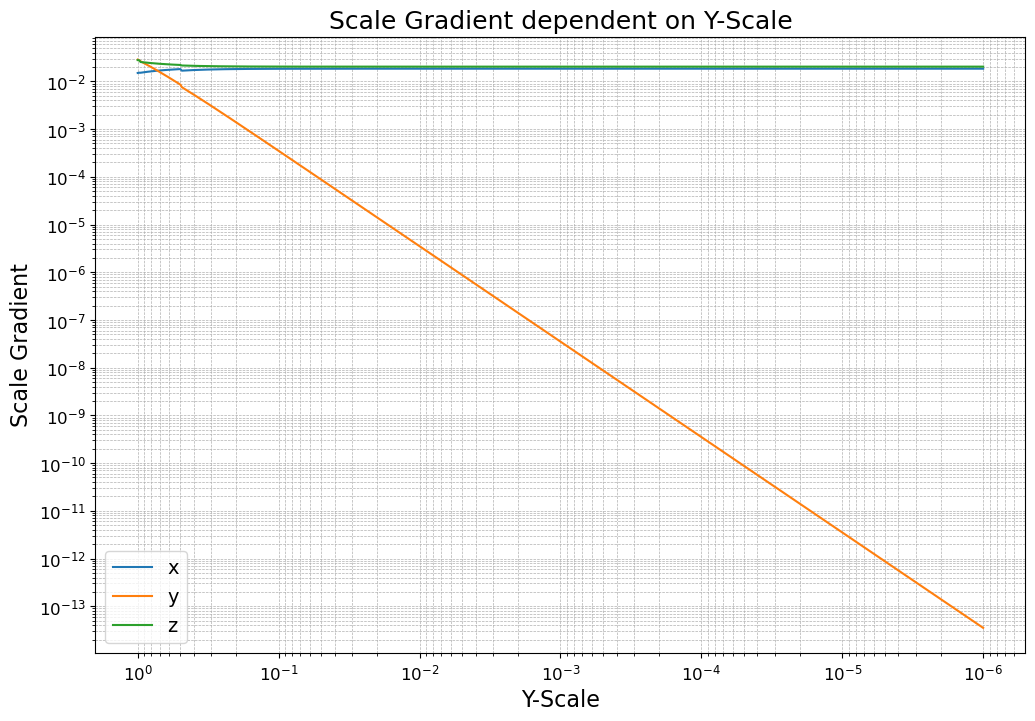

In [10]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(12, 8))

size_grads_plot = size_grads.copy()
# size_grads_plot = np.abs( size_grads_plot )
# size_grads_plot[ size_grads != size_grads ] = 1e2 # remove nans
# size_grads_plot[ size_grads == 0 ] = 1e-12 # remove zeros (should not happen)

plt.plot( y_sizes, size_grads_plot[:,0], label="x" )
plt.plot( y_sizes, size_grads_plot[:,1], label="y" )
plt.plot( y_sizes, size_grads_plot[:,2], label="z" )
plt.gca().invert_xaxis()    # from thick to thin
plt.legend(fontsize=14)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Background grid
plt.xscale("log") # gradients can get very big, so use log scale
# if (size_grads_plot <= 0).any():
#     plt.yscale("linear")
# else:
#     plt.yscale("log")
plt.yscale("symlog", linscale=1, linthresh=1e-14, subs=np.arange(10))

plt.title('Scale Gradient dependent on Y-Scale', fontsize=18)
plt.xlabel("Y-Scale", fontsize=16)
plt.ylabel('Scale Gradient', fontsize=16)

lims = list(plt.ylim())
lims[0] = np.min(size_grads_plot) * ( 3 if np.min(size_grads_plot) < 0 else 0.3 )
lims[1] = np.max(size_grads_plot) * 3
plt.ylim(*lims)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

from pathlib import Path
path = Path("/home/user1/Documents/Master/worktree/gaussian_renderer/tmp")
# plt.savefig( str(path / f"numerical_issues_solved.png") )
plt.show()
# plt.close()

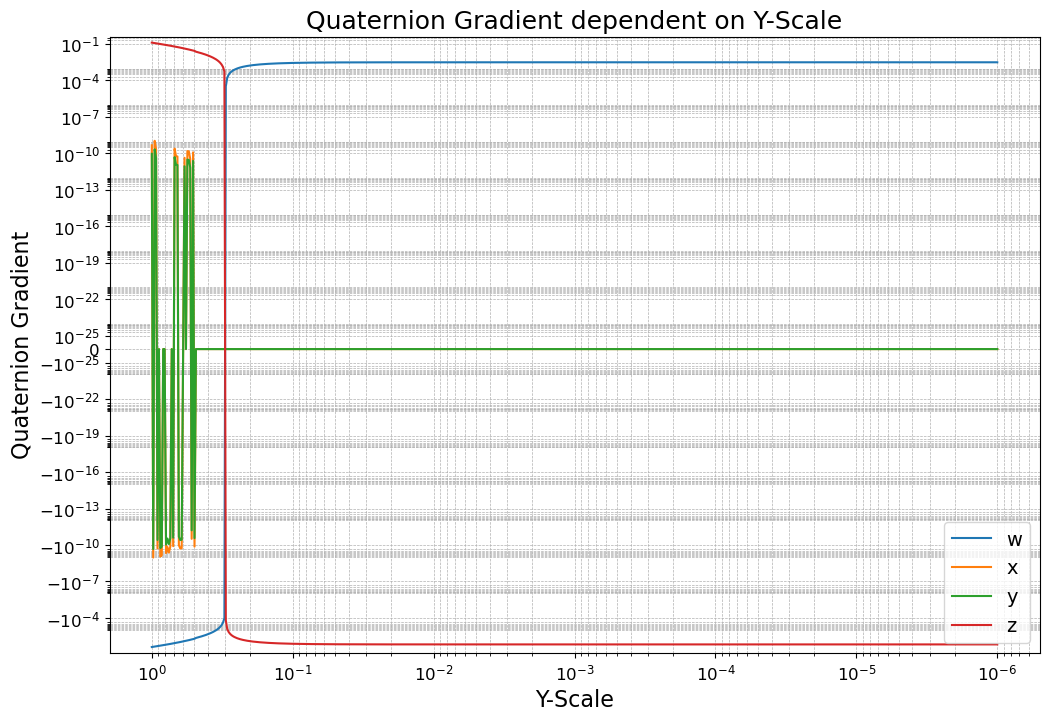

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

f = plt.figure(figsize=(12, 8))

quaternion_grads_plot = quaternion_grads.copy()
# quaternion_grads_plot = np.abs( quaternion_grads_plot )
# quaternion_grads_plot[ quaternion_grads != quaternion_grads ] = 1e2 # remove nans
# quaternion_grads_plot[ quaternion_grads == 0 ] = 1e-24 # remove zeros (should not happen)

plt.plot( y_sizes, quaternion_grads_plot[:,0], label="w" )
plt.plot( y_sizes, quaternion_grads_plot[:,1], label="x" )
plt.plot( y_sizes, quaternion_grads_plot[:,2], label="y" )
plt.plot( y_sizes, quaternion_grads_plot[:,3], label="z" )
plt.gca().invert_xaxis()    # from thick to thin
plt.legend(fontsize=14)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Background grid
plt.xscale("log") # gradients can get very big, so use log scale
# if (quaternion_grads_plot <= 0).any():
#     plt.yscale("linear")
# else:
#     plt.yscale("log")

plt.yscale("symlog", linscale=1, linthresh=1e-25, subs=np.arange(10))


plt.title('Quaternion Gradient dependent on Y-Scale', fontsize=18)
plt.xlabel("Y-Scale", fontsize=16)
plt.ylabel('Quaternion Gradient', fontsize=16)

lims = list(plt.ylim())
lims[0] = np.min(quaternion_grads_plot) * ( 3 if np.min(quaternion_grads_plot) < 0 else 0.3 )
lims[1] = np.max(quaternion_grads_plot) * 3
plt.ylim(*lims)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

from pathlib import Path
path = Path("/home/user1/Documents/Master/worktree/gaussian_renderer/tmp")
# plt.savefig( str(path / f"numerical_issues_solved.png") )
plt.show()
# plt.close()